In [1]:
import biosonic
print(biosonic.__file__)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/__init__.py


In [2]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from biosonic.plot import plot_filterbank_and_cepstrum, plot_spectrogram, plot_cepstrum, plot_cepstral_coefficients
from biosonic.filter import mel_filterbank, log_filterbank
from biosonic.compute.spectrotemporal import cepstral_coefficients, spectrogram, cepstrum, dominant_frequencies
from biosonic.handle import read_wav

In [3]:
n_filters = 20
n_fft = 1024
n_ceps = 32

f1 = 200
f2 = 5000
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

In [4]:
from biosonic.compute.utils import hz_to_mel

hz_to_mel(200)

np.float64(652.1609413889511)

<Axes: title={'center': 'log-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

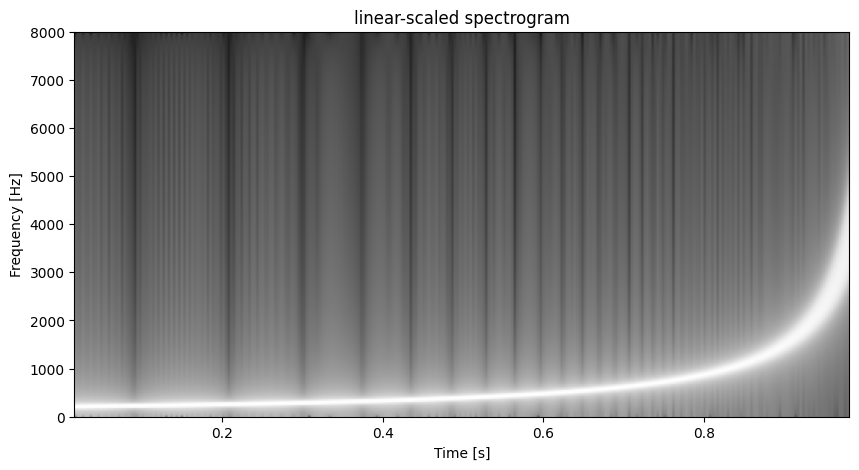

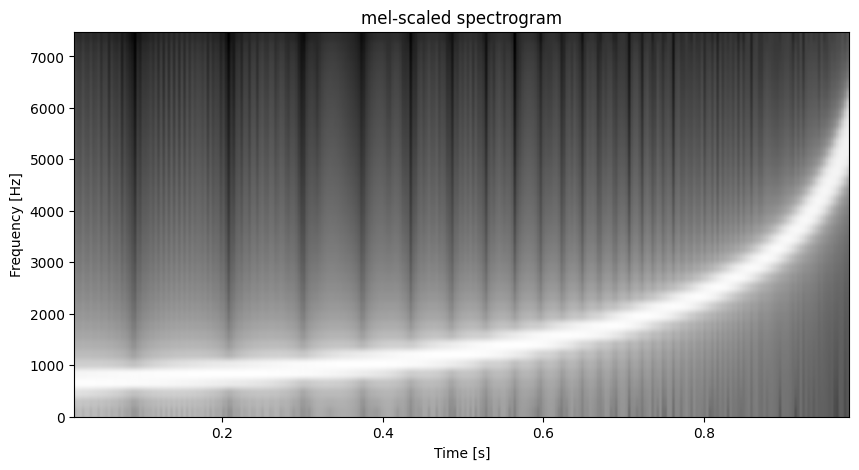

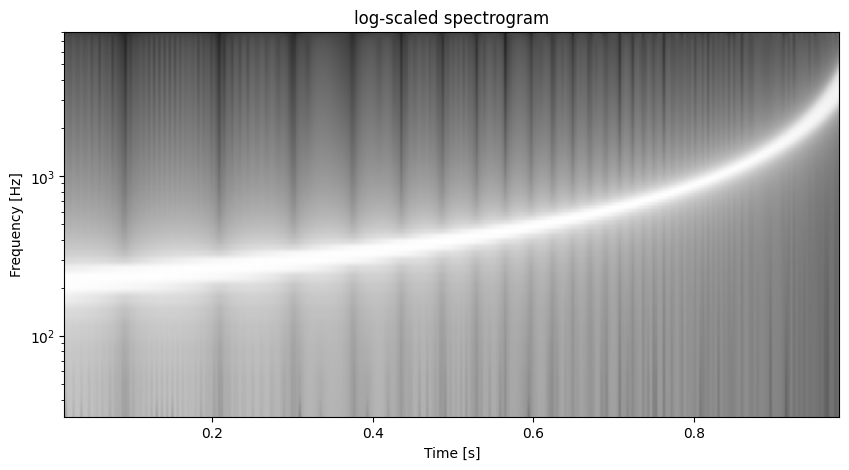

In [5]:
plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey')

plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="mel")

plot_spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90, cmap='grey', freq_scale="log", flim=(0,8000), n_bands=24)

In [6]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/GT00742_10_Boris_contact.wav")

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/handle.py:206: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(filepath)


<Axes: title={'center': 'log-scaled spectrogram'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>

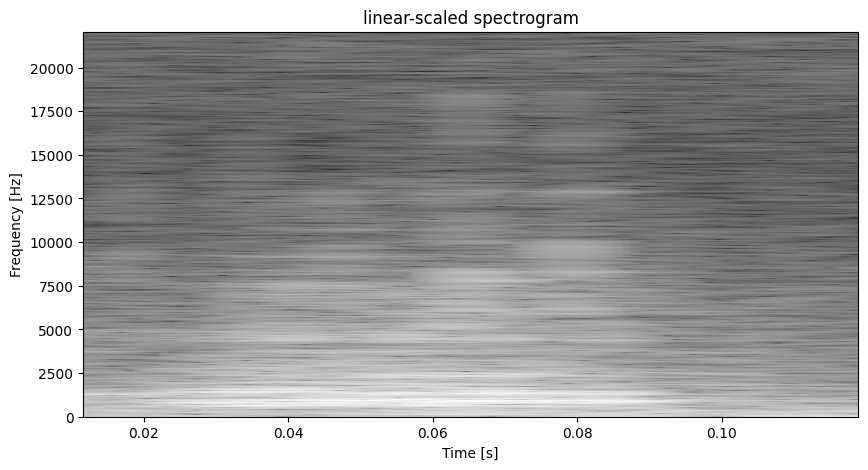

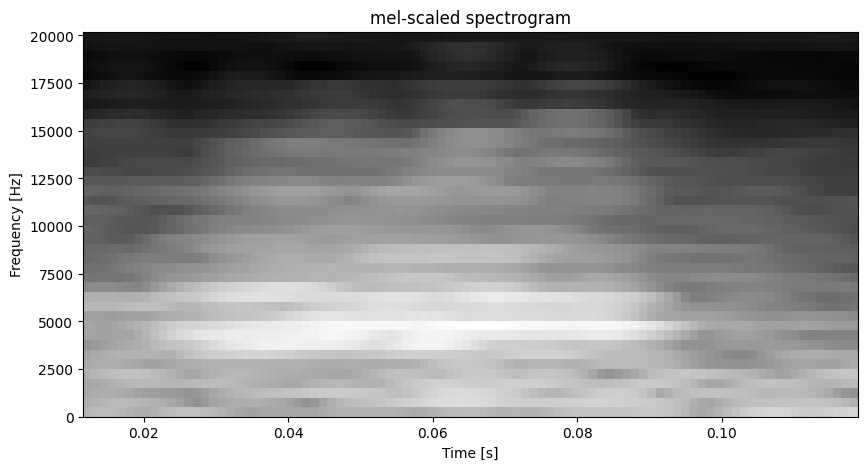

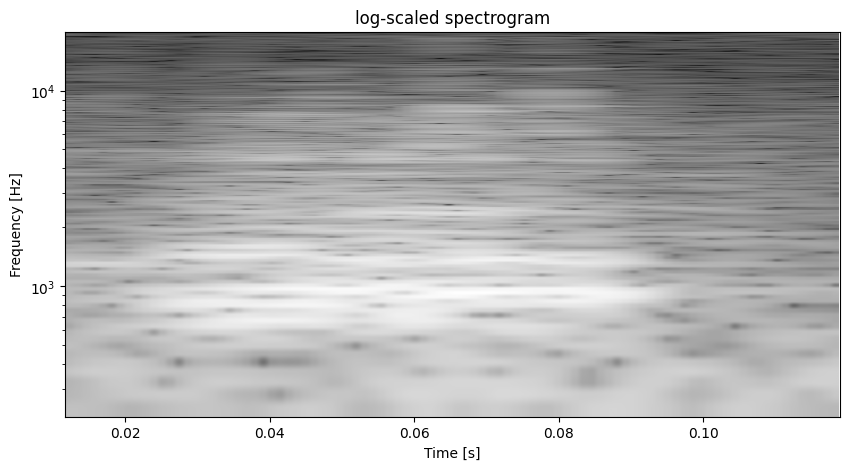

In [7]:
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey')
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="mel")
plot_spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95, cmap='grey', freq_scale="log", flim=(200, 20000), n_bands = 24)

[3.9635162e+01 5.4068103e+00 5.8359408e-01 ... 3.7286179e-03 5.8359408e-01
 5.4068103e+00]


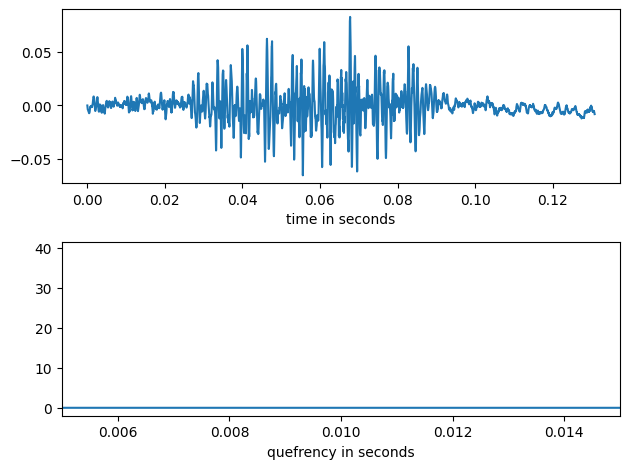

In [8]:
ceps, _ = cepstrum(signal_.data, signal_.sr)
print(ceps)
plot_cepstrum(signal_.data, signal_.sr)

In [9]:
# fbanks, _ = mel_filterbank(10, n_fft, sr)
# ceps = cepstrum(x, sr)
# plot_cepstral_coefficients(x, sr, n_fft)
# #ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)

# plot_filterbank_and_cepstrum(
#         fbanks, 
#         sr,
#         n_fft, 
#         ceps, 
#         fmax=None, 
#         title_prefix="")
# plot_cepstrum(x, sr)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/compute/pitch.py:395: RuntimeWarning: divide by zero encountered in divide
  sampled_autocorr = lag_domain / autocorr_hann
/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/compute/pitch.py:395: RuntimeWarning: invalid value encountered in divide
  sampled_autocorr = lag_domain / autocorr_hann
/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/compute/pitch.py:278: RuntimeWarning: divide by zero encountered in divide
  freqs = sr / sampled_autocorr


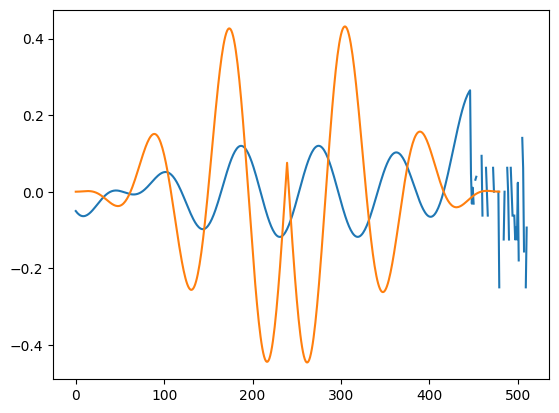

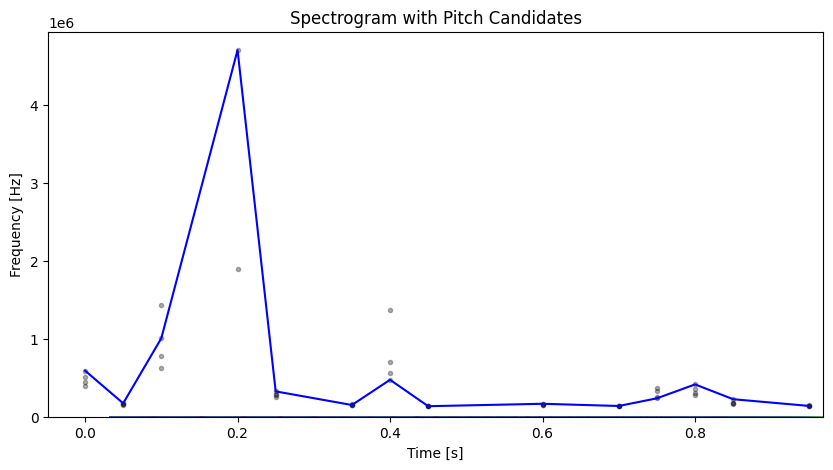

[[(0.0, np.float64(13.305318626536794)), (np.float64(591841.0483871424), np.float64(0.24374355582543838)), (np.float64(508193.459314683), np.float64(0.2310506722352668)), (np.float64(396572.96835209517), np.float64(0.1204805407003873)), (np.float64(445265.8792218), np.float64(0.11367611952480897))], [(0.0, np.float64(15.898013332563153)), (np.float64(172240.1578191865), np.float64(0.3643693734365837)), (np.float64(162484.76273526702), np.float64(0.2014694431549644)), (np.float64(158363.35062124534), np.float64(0.12163156100928428)), (np.float64(154678.6836313287), np.float64(0.11964147791560782))], [(0.0, np.float64(15.67045857132862)), (np.float64(1007984.8459860247), np.float64(0.24405360026982287)), (np.float64(1440654.4258786933), np.float64(0.2432917852598601)), (np.float64(776138.1743116645), np.float64(0.2201713903854664)), (np.float64(631829.6933428332), np.float64(0.11944879740507784))], [(0.0, np.float64(15.746036408647162)), (np.float64(-186245.38394477384), np.float64(0.243

In [10]:
from biosonic.plot import plot_pitch_candidates, plot_pitch_on_spectrogram
from biosonic.compute.pitch import boersma, yin

# praat autocorrelation pitch tracking
time_points, candidates = boersma(x, sr, min_pitch=100, max_pitch=6000, voicing_thresh=.6, timestep=0.05)
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=n_fft, overlap=95)
plot_pitch_on_spectrogram(x, sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))
print(candidates)

# # yin method
# pitch_points = yin(x, sr, n_fft, 0.01, (100, 8000))
# print(pitch_points)
# time_points = np.arange(len(pitch_points)) * 0.01
# plot_pitch_candidates(time_points, pitch_points)
# plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))

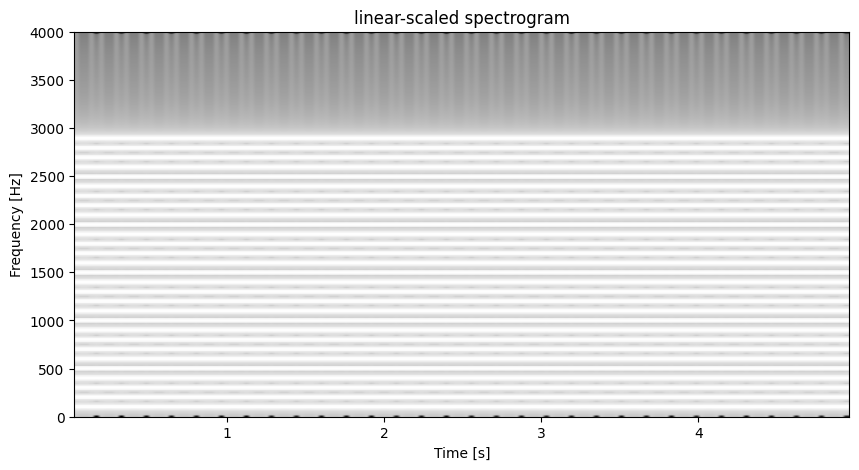

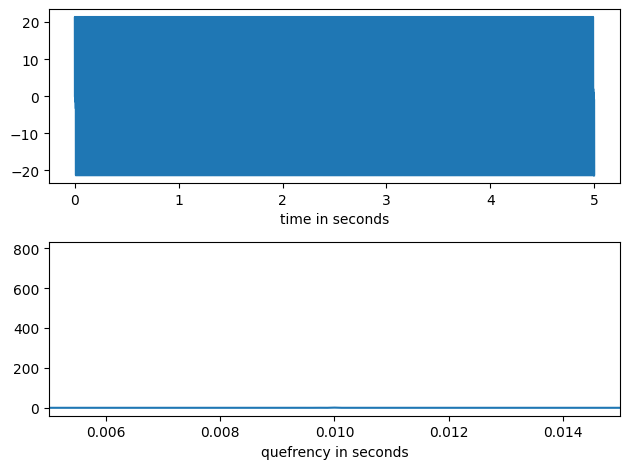

In [11]:
duration = 5.0
sr = 8000.0
samples = int(sr*duration)
t = np.arange(samples) / sr
fundamental = 100.0
harmonics = np.arange(1, 30) * fundamental
data = np.sin(2.0*np.pi*harmonics[:,None]*t).sum(axis=0)

Sx, t, f = spectrogram(data, sr)
plot_spectrogram(data, sr, cmap='grey', window_length=512)
plot_cepstrum(data, sr)

In [12]:
# from biosonic.handle import batch_normalize_wav_files

# batch_normalize_wav_files("/Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles", 44100, 1, "float32")

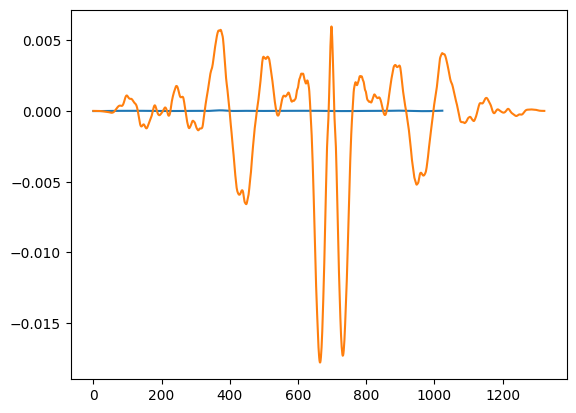

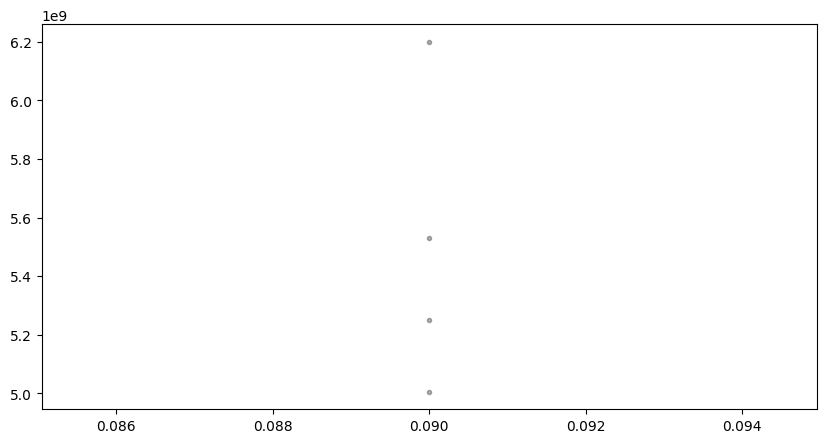

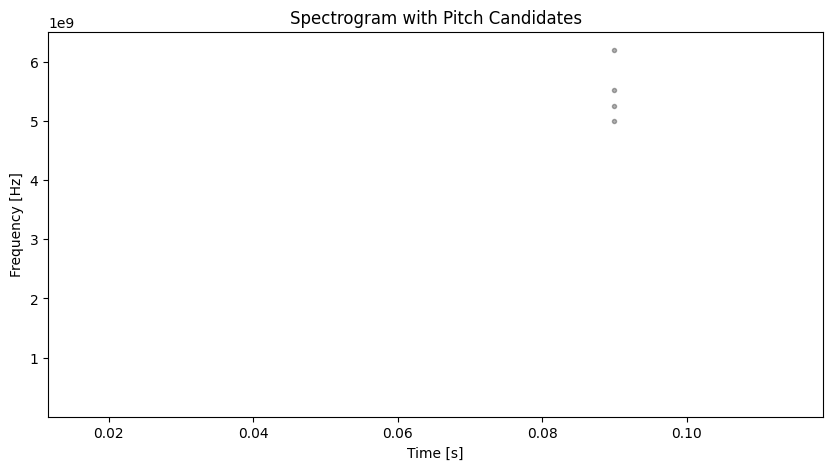

[436.63366337 436.63366337 158.06451613 156.93950178  27.37430168
  33.38380015 102.08333333 116.66666667 436.63366337 436.63366337]


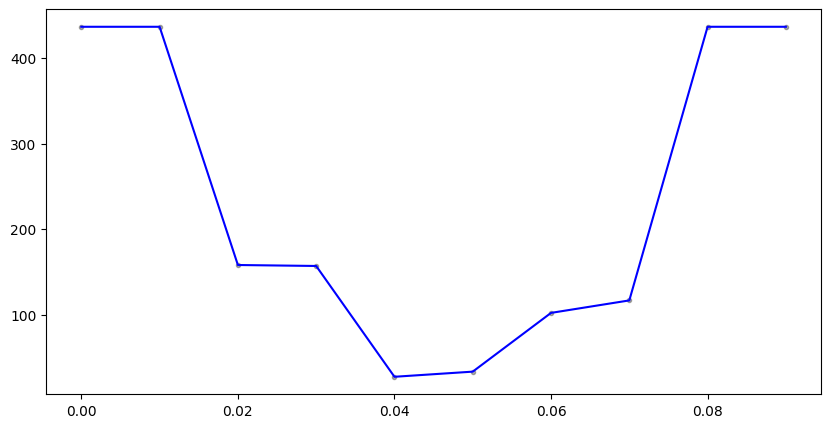

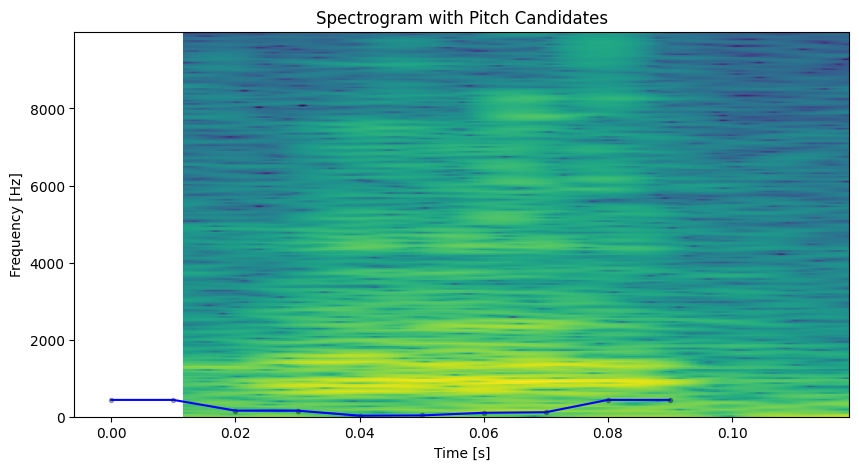

In [13]:
# Run pitch tracking
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=100, max_pitch=2000)
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95)
#plot_spectrogram(Sx, t, f, cmap='grey')

# Plot
plot_pitch_candidates(time_points, candidates)
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

# yin method

pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.01, (100, 2000))
print(pitch_points)
time_points = np.arange(len(pitch_points)) * 0.01
plot_pitch_candidates(time_points, pitch_points)
# Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))

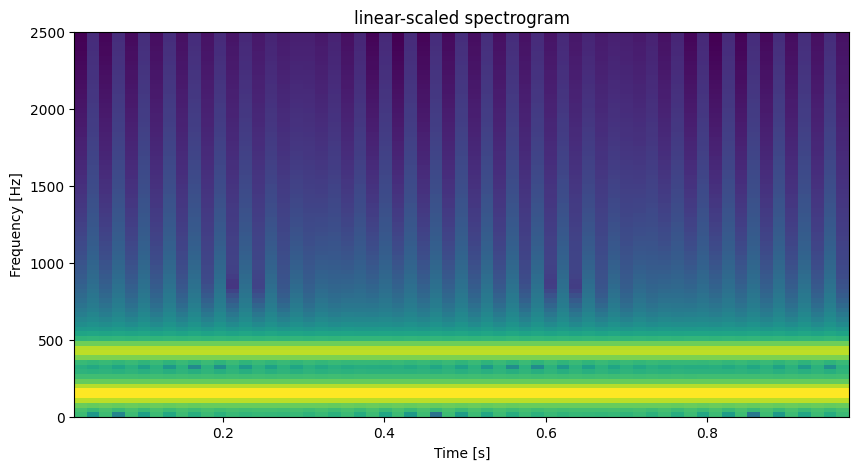

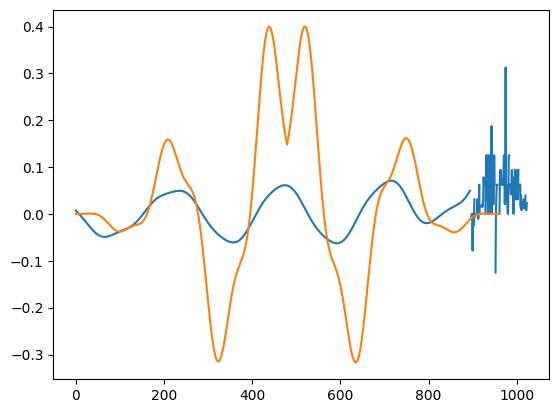

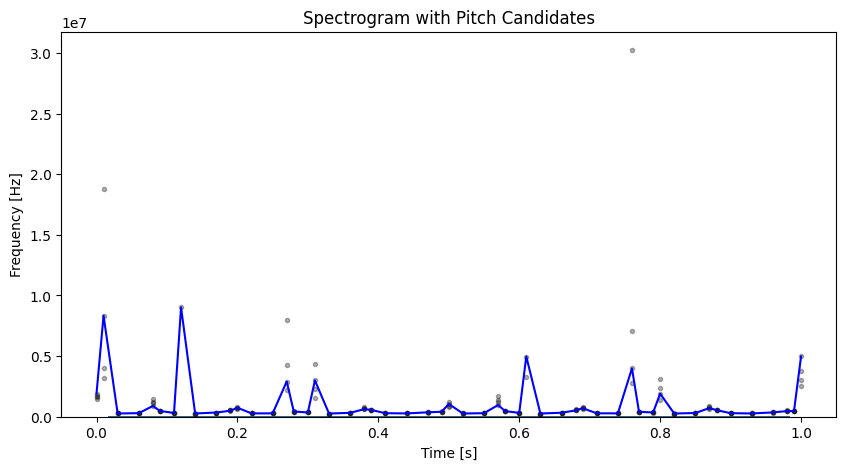

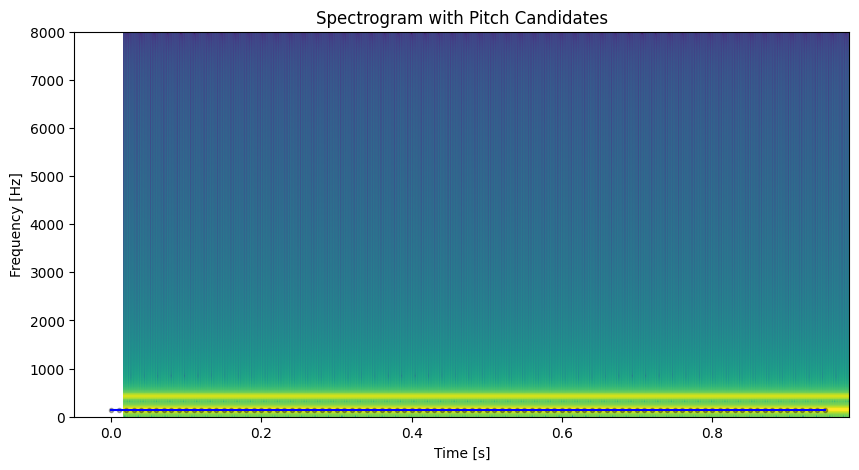

In [14]:
from biosonic.synthesize import amplitude_modulated

sr = 16000
n_fft = 512
time_points = np.linspace(0, 1, sr)
x = amplitude_modulated(time_points, 140, 280)
plot_spectrogram(x, sr, flim=(0, 2500))

times, candidates = boersma(x, sr, min_pitch=50, max_pitch=1000)
plot_pitch_on_spectrogram(x, sr, times, candidates, window_length=n_fft, overlap=95, flim=(0,10000))

pitch_points = yin(x, sr, n_fft, 0.01, (100, 2000))
time_points = np.arange(len(pitch_points)) * 0.01
plot_pitch_on_spectrogram(x, sr, time_points, pitch_points, window_length=n_fft, overlap=95, flim=(0,10000))


In [15]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/clips_from_selections/200_highpass/GT00211_G00908_Julian_distance.wav")
win_len = 512
overlap = 50
# Run pitch tracking
time_points, candidates = boersma(signal_.data, signal_.sr, min_pitch=500, max_pitch=2500)
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=win_len, overlap=overlap)

# Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, candidates, window_length=n_fft, overlap=overlap)
dom_freqs = dominant_frequencies(signal_.data, signal_.sr, n_freqs = 1, window_length=win_len, overlap=overlap)

dom_freqs = np.nan_to_num(dom_freqs)

# # yin method
# pitch_points = yin(signal_.data, signal_.sr, n_fft, 0.01, (500, 2500))
# time_points = np.arange(len(pitch_points)) * 0.01 
# plot_pitch_on_spectrogram(signal_.data, signal_.sr, time_points, pitch_points, window_length=n_fft, overlap=overlap)

# # Plot
plot_pitch_on_spectrogram(signal_.data, signal_.sr, t, dom_freqs, window_length=win_len, overlap=overlap)

TypeError: can only concatenate list (not "NoneType") to list

In [ ]:
plt.close()